In [3]:
# import fastai library
from fastai.vision.all import *

# Load the data
path = os.getcwd()
thermal_path = os.path.join(path , 'img/thermal/')

SyntaxError: future feature annotations is not defined (dispatch.py, line 4)

In [4]:
# Define the function to return the label
def is_person(x):
    if x.name.split('_')[1] == 'nusiance':
        return 'Nusiance'
    else:
        return 'Person'
        
# Define the datablock called pets
persons = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = is_person,
    splitter = RandomSplitter(valid_pct=0.25, seed=42),
    item_tfms = Resize(420),
    batch_tfms = aug_transforms(size = 244, mult=1.5),
)

# Define the dataloaders from the pets datablock
dls = persons.dataloaders(thermal_path)

# Show some images from the dataloader
dls.show_batch(max_n = 6)

NameError: name 'DataBlock' is not defined

/home/cawin/anaconda3/lib/python3.9/site-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(valley=0.0012022644514217973)

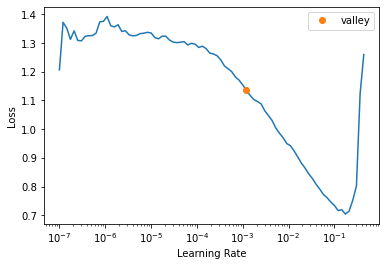

In [5]:
# Define the model using cnn_learner
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

# Find the optimal lr using lr_find()
learn.lr_find()

In [12]:
learn.fine_tune(10, base_lr=12e-4, freeze_epochs=3) 

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.046224,0.424850,0.801296,0.198704,09:23
1,0.768490,0.156644,0.937365,0.062635,09:18
2,0.571015,0.098609,0.969762,0.030238,09:28


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.278043,0.126207,0.961123,0.038877,09:53
1,0.228838,0.060990,0.980562,0.019438,08:34
2,0.150259,0.014652,0.997840,0.002160,08:34
3,0.101779,0.010078,0.997840,0.002160,08:32
4,0.080433,0.009660,0.997840,0.002160,08:38
5,0.059429,0.005470,0.995680,0.004320,08:35
6,0.046745,0.015593,0.995680,0.004320,08:36
7,0.038544,0.011601,0.995680,0.004320,08:34
8,0.039221,0.009814,0.995680,0.004320,08:35


KeyboardInterrupt: 

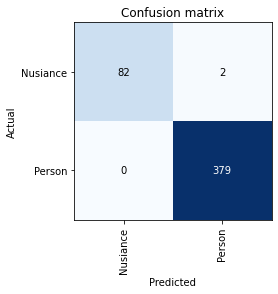

In [13]:
# create the interepreation object from our model
interep = ClassificationInterpretation.from_learner(learn)

# Plot the confusion matrix
interep.plot_confusion_matrix()

In [1]:
import torch
torch.cuda.device_count()
torch.cuda.get_device_name(0)

AssertionError: Torch not compiled with CUDA enabled